In [1]:
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# get one specific station's data from specified month period

main_directory = './dataConverted'

dfs = []

station_id = "013590"

for year_directory in os.listdir(main_directory):
    year_directory_path = os.path.join(main_directory, year_directory)
    
    if os.path.isdir(year_directory_path):
        for filename in os.listdir(year_directory_path):
            if station_id in filename:
                df = pd.read_csv(os.path.join(year_directory_path, filename))
                df = df[((df['date'] % 10000) // 100 >= 3) & ((df['date'] % 10000) // 100 <= 6)]
                dictionary = {
                    "winddir": df["winddir"].mean(),
                    "sky": df["sky"].mean(),
                    "visdist": df["visdist"].mean(),
                    "airtemp": df["airtemp"].mean(),
                    "dewpointtemp": df["dewpointtemp"].mean(),
                    "atmpress": df["atmpress"].mean(),
                    "year": int(year_directory)
                }
                dfs.append(dictionary)
                

df = pd.DataFrame(dfs)
df = df.sort_values(by = "year")
df

,winddir,sky,visdist,airtemp,dewpointtemp,atmpress,year
0,358.637423,99999.000000,882623.359150,46.906443,-16.645990,10235.849212,2014
4,330.806885,99930.257143,881678.793115,26.058864,-27.248193,10155.403442,2015
9,369.202948,99964.739116,880789.319506,40.014398,-14.820021,10132.722660,2016
5,344.992118,98689.215559,880387.458533,35.464359,-10.899246,10123.589788,2017
8,288.484070,96792.463515,882051.815348,33.877355,-28.660500,10154.779719,2018
6,255.198494,97402.181725,880361.128337,324.369952,276.986311,12779.960301,2019
7,236.781086,96474.701926,881932.057793,100.133100,42.953765,10710.803152,2020
1,204.909091,76953.818182,574544.909091,-7.545455,-83.545455,10217.545455,2022
3,200.720000,73923.280000,656359.360000,46.920000,-8.680000,10134.440000,2023
2,187.688525,95843.315574,628344.913934,-31.098361,-58.286885,10131.811475,2024


In [31]:
df.set_index("year", inplace = True)
df

,winddir,sky,visdist,airtemp,dewpointtemp,atmpress
year,,,,,,
2014,358.637423,99999.000000,882623.359150,46.906443,-16.645990,10235.849212
2015,330.806885,99930.257143,881678.793115,26.058864,-27.248193,10155.403442
2016,369.202948,99964.739116,880789.319506,40.014398,-14.820021,10132.722660
2017,344.992118,98689.215559,880387.458533,35.464359,-10.899246,10123.589788
2018,288.484070,96792.463515,882051.815348,33.877355,-28.660500,10154.779719
2019,255.198494,97402.181725,880361.128337,324.369952,276.986311,12779.960301
2020,236.781086,96474.701926,881932.057793,100.133100,42.953765,10710.803152
2022,204.909091,76953.818182,574544.909091,-7.545455,-83.545455,10217.545455
2023,200.720000,73923.280000,656359.360000,46.920000,-8.680000,10134.440000


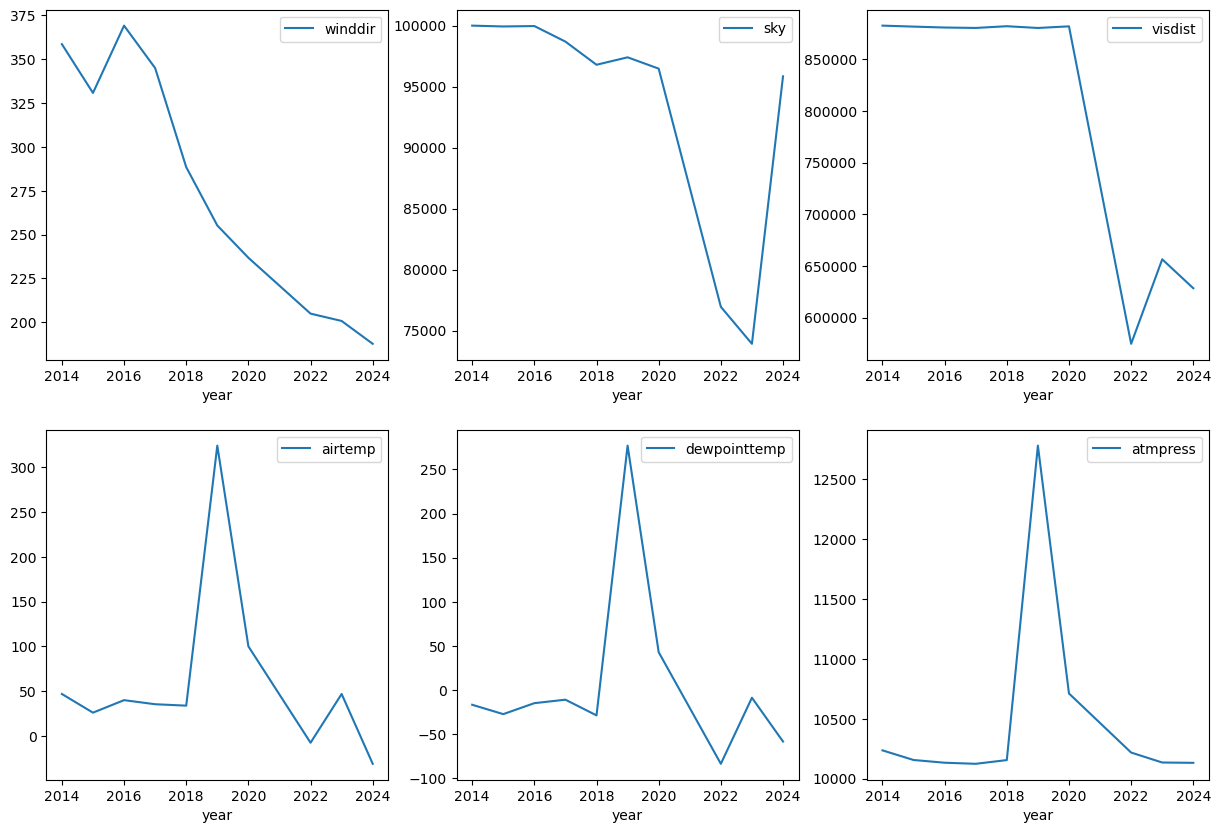

In [35]:
attributes = ['winddir', 'sky', 'visdist', 'airtemp', 'dewpointtemp', 'atmpress']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

axes = axes.flatten()

for i, attribute in enumerate(attributes):
    df[attribute].plot(ax=axes[i], legend=True)
    ax.set_title(attribute)  

plt.show()

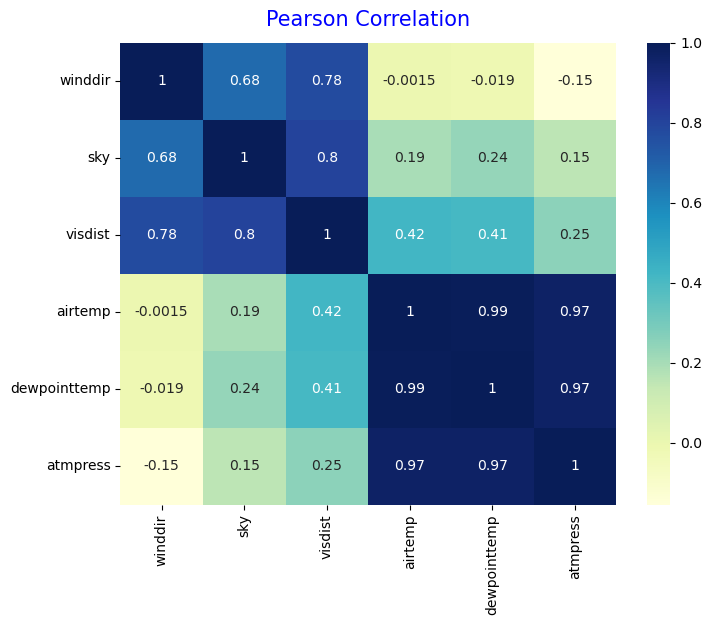

In [36]:
# using pearson correlation
plt.figure(figsize = (8, 6))
sns.heatmap(df.corr(numeric_only = True), annot = True, cmap = 'YlGnBu')
plt.title("Pearson Correlation", fontsize = 15, color = 'b', pad = 12, loc = 'center')
plt.show()